In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ÏãúÌÄÄÏä§(Î¶¨Ïä§Ìä∏, Î¨∏ÏûêÏó¥ Îì±) ÏïàÏóêÏÑú Í∞Å ÏõêÏÜåÍ∞Ä Î™á Î≤à Îì±Ïû•ÌñàÎäîÏßÄ ÏÑ∏Ï£ºÎäî ÎπàÎèÑ Í≥ÑÏÇ∞ ÎèÑÍµ¨ -> Ïö∞Î¶¨Îäî ÏµúÎπàÍ∞í Í≥ÑÏÇ∞Ìï† Îïå ÏÇ¨Ïö©
from collections import Counter

np.random.seed(42)

# Î™áÍ∞ÄÏßÄ toolÏùÑ Ìï®ÏàòÎ°ú ÎßåÎì§Ïñ¥ ÎÜìÏùÄÍ≤É

def summary_stats(series, is_continuous=True, bins=50):
    mean = float(series.mean())
    median = float(series.median())
    std = float(series.std(ddof=1))
    # 'Ïã§Ïàò'Îäî ÏµúÎπàÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ Ïñ¥Î†µÎã§.
    if is_continuous:
        counts, edges = np.histogram(series, bins=bins)
        idx = int(np.argmax(counts))
        mode_est = float((edges[idx] + edges[idx+1]) / 2.0)
        # Ïù¥ÏÇ∞Ìòï Îç∞Ïù¥ÌÑ∞Îì§(Ï†ïÏàòÌòï) ex. Ï†êÏàò, Îì±Í∏â
    else:
        c = Counter(series.tolist())
        mode_est = float(Counter(series.tolist()).most_common(1)[0][0])
    return {"mean": mean, "median": median, "mode": mode_est, "std": std}

# Í∑∏Î¶∞ Í∑∏ÎûòÌîÑÎ•º Ï†ÄÏû•
def savefig(name):
    path = f"{name}.png"
    plt.tight_layout()
    plt.savefig(path, dpi=180, bbox_inches="tight")
    plt.show()
    print(f"Saved figure to {path}")

# 'Í∏àÏúµ'ÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ≤å ÎêòÎäî 'ÏàòÏùµÎ•† Í≥ÑÏÇ∞'
def annualized_stats(monthly_returns):
    monthly_geom = np.prod(1 + monthly_returns) ** (1/len(monthly_returns)) - 1
    ann_return = (1 + monthly_geom) ** 12 - 1
    ann_std = np.std(monthly_returns, ddof=1) * np.sqrt(12)
    return float(ann_return), float(ann_std)

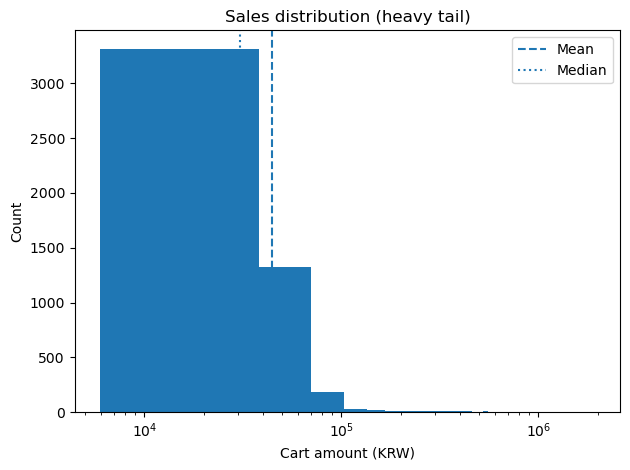

Saved figure to sales_hist.png


In [ ]:
# ÏûÑÏùòÎ°ú ÎßåÎì† Îç∞Ïù¥ÌÑ∞ (ÌåêÎß§Îüâ)
n = 5000
regular = np.random.lognormal(mean=np.log(30000), sigma=0.5, size=int(n*0.97))  # typical carts around 30k KRW
vip = np.random.lognormal(mean=np.log(300000), sigma=0.6, size=int(n*0.03))     # VIP big orders
sales = pd.Series(np.concatenate([regular, vip]))

stats_sales = summary_stats(sales, is_continuous=True, bins=60)
stats_sales["scenario"] = "Sales (KRW)"

# Plot histogram
plt.figure()
plt.hist(sales, bins=60)
plt.xlabel("Cart amount (KRW)")
plt.ylabel("Count")
plt.title("Sales distribution (heavy tail)")
plt.xscale("log")
plt.axvline(stats_sales["mean"], linestyle="--", label="Mean")
plt.axvline(stats_sales["median"], linestyle=":", label="Median")
plt.legend()
savefig("sales_hist")

In [12]:
stats_sales

{'mean': 44537.423285731085,
 'median': 30733.369886916327,
 'mode': 22067.979330041737,
 'std': 79956.02282550688,
 'scenario': 'Sales (KRW)'}

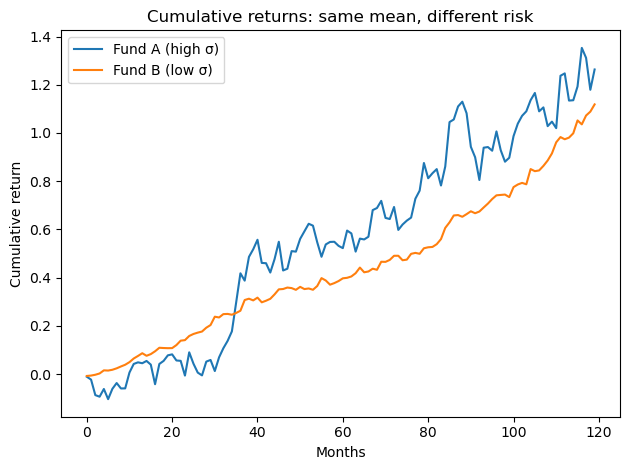

Saved figure to funds_cumulative.png


In [ ]:
# ÏûÑÏùòÎ°ú ÎßåÎì† Îç∞Ïù¥ÌÑ∞ (ÌéÄÎìú)
months = 120  # 10 years
fundA = np.random.normal(loc=0.006, scale=0.04, size=months)  # high vol
fundB = np.random.normal(loc=0.006, scale=0.01, size=months)  # low vol

ann_ret_A, ann_std_A = annualized_stats(fundA)
ann_ret_B, ann_std_B = annualized_stats(fundB)

stats_fundA = {"mean": ann_ret_A, "median": float(np.median(fundA))*12, "mode": float(pd.Series(fundA).mode().iloc[0]), "std": ann_std_A, "scenario": "Fund A (annualized)"}
stats_fundB = {"mean": ann_ret_B, "median": float(np.median(fundB))*12, "mode": float(pd.Series(fundB).mode().iloc[0]), "std": ann_std_B, "scenario": "Fund B (annualized)"}

# Plot
plt.figure()
cum_A = np.cumprod(1 + fundA) - 1
cum_B = np.cumprod(1 + fundB) - 1
plt.plot(cum_A, label="Fund A (high œÉ)")
plt.plot(cum_B, label="Fund B (low œÉ)")
plt.xlabel("Months")
plt.ylabel("Cumulative return")
plt.title("Cumulative returns: same mean, different risk")
plt.legend()
savefig("funds_cumulative")

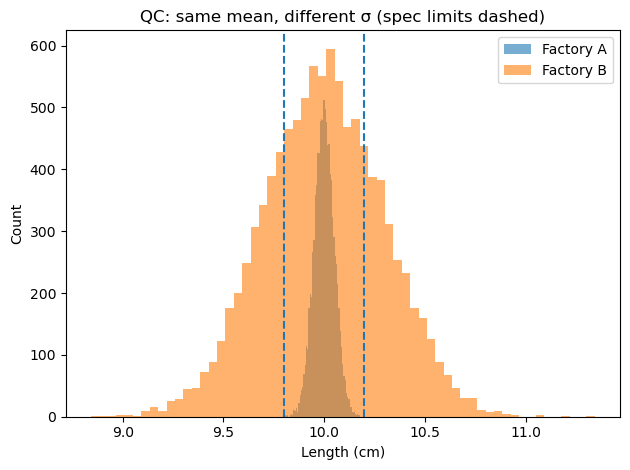

Saved figure to qc_hist_overlay.png


In [ ]:
# ÏûÑÏùòÎ°ú ÎßåÎì† Îç∞Ïù¥ÌÑ∞ (Í≥µÏû• Î∂àÎüâÎ•†)
n_parts = 10000
factoryA = np.random.normal(loc=10.0, scale=0.05, size=n_parts)  # tight
factoryB = np.random.normal(loc=10.0, scale=0.3, size=n_parts)   # loose

# Ïö∞ÏÑ† ÏßÄÍ∏àÏùÄ ÏÉÅÌïúÌïòÌïúÏùÑ ÏàòÎèôÏúºÎ°ú ÏÑ§Ï†ïÌï®
# ÏÉÅÌïúÌïòÌïúÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï†ïÌï† ÏàòÎèÑ, Î®∏Ïã†Î®∏ÎãùÏúºÎ°ú Ï†ïÌï† ÏàòÎèÑ, Ïß¨Î∞î ÎßéÏùÄ ÏÇ¨ÎûåÏù¥ ÏàòÎèôÏúºÎ°ú Ï†ïÌï† ÏàòÎèÑ ÏûàÏùå.
spec_low, spec_high = 9.8, 10.2 
defectA = np.mean((factoryA < spec_low) | (factoryA > spec_high))
defectB = np.mean((factoryB < spec_low) | (factoryB > spec_high))

stats_A = summary_stats(pd.Series(factoryA), is_continuous=True, bins=60)
stats_A.update({"scenario": "Factory A length (cm)", "defect_rate": float(defectA)})
stats_B = summary_stats(pd.Series(factoryB), is_continuous=True, bins=60)
stats_B.update({"scenario": "Factory B length (cm)", "defect_rate": float(defectB)})

# Histogram
plt.figure()
plt.hist(factoryA, bins=60, alpha=0.6, label="Factory A")
plt.hist(factoryB, bins=60, alpha=0.6, label="Factory B")
plt.axvline(spec_low, linestyle="--")
plt.axvline(spec_high, linestyle="--")
plt.xlabel("Length (cm)")
plt.ylabel("Count")
plt.title("QC: same mean, different œÉ (spec limits dashed)")
plt.legend()
savefig("qc_hist_overlay")

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ : 6ÏãúÍ∑∏Îßà
# ÎßéÏùÄ Ï†úÏ°∞Í∏∞ÏóÖÏóêÏÑú ÌíàÏßàÍ¥ÄÎ¶¨Î•º ÏúÑÌï¥ ÏãúÎèÑÌñàÎçò Ìä∏Î†åÎìú.
# 1ÏãúÍ∑∏Îßà -> 66%Ïùò Îç∞Ïù¥ÌÑ∞Ïóê Ìï¥Îãπ. -> ÎßùÌïòÍ≤†Ï£†? (ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†úÏ°∞ÏóÖ Í∏∞ÏóÖÎì§Ïù¥ Ïù¥ÏÉÅÎç∞Ïù¥ÌÑ∞Í∞Ä ÌòÑÏ†ÄÌûà Ï†ÅÏùÄ Ïù¥Ïú†)
# 2ÏãúÍ∑∏Îßà 95% / 3ÏãúÍ∑∏Îßà 99% / 4ÏãúÍ∑∏Îßà... / 6ÏãúÍ∑∏ÎßàÎäî ÎåÄÎã®Ìïú Ïàò
# Ï†úÏ°∞dataÎäî Ï†ïÏÉÅÎç∞Ïù¥ÌÑ∞Í∞Ä ÎåÄÎ∂ÄÎ∂ÑÏù¥Í≥† Ïù¥ÏÉÅÎç∞Ïù¥ÌÑ∞Îäî Í∑πÏÜåÏàòÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Î∂ÑÏÑùÌï† Ïàò ÏûàÎäî Ïó≠ÎüâÏù¥ ÌïÑÏöîÌï®

In [16]:
stats_A

{'mean': 9.999972321116019,
 'median': 9.999791387491616,
 'mode': 9.99948069269779,
 'std': 0.05025272830473992,
 'scenario': 'Factory A length (cm)',
 'defect_rate': 0.0}

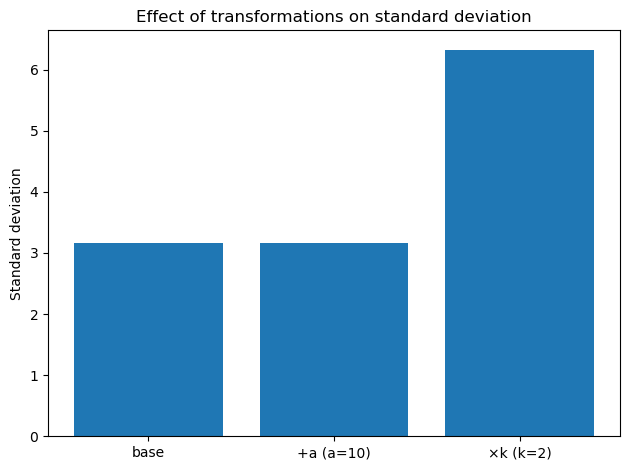

Saved figure to transform_std.png


In [ ]:
# ÏûÑÏùòÎ°ú ÎßåÎì† Îç∞Ïù¥ÌÑ∞
x = np.array([2, 4, 6, 8, 10], dtype=float)
plus_a = x + 10
times_k = x * 2
std_base = float(np.std(x, ddof=1))
std_plus_a = float(np.std(plus_a, ddof=1))
std_times_k = float(np.std(times_k, ddof=1))
df_transform = pd.DataFrame({
    "dataset": ["base", "+a (a=10)", "√ók (k=2)"],
    "std": [std_base, std_plus_a, std_times_k],
    "mean": [float(np.mean(x)), float(np.mean(plus_a)), float(np.mean(times_k))]
})

# Bar chart
plt.figure()
plt.bar(df_transform["dataset"], df_transform["std"])
plt.title("Effect of transformations on standard deviation")
plt.ylabel("Standard deviation")
savefig("transform_std")


> scailing Ï§ëÏóêÏÑú standardization(ÌëúÏ§ÄÌôî) -> ÌèâÍ∑† = 0, ÌëúÏ§ÄÌé∏Ï∞® = 1
> 
> scailingÏùÄ ÌÅ¨Í≤å Îëê Í∞ÄÏßÄ -> nonmalization (Ï†ïÍ∑úÌôî) / standardization (ÌëúÏ§ÄÌôî)


### üìä Ï†ïÍ∑úÌôî(Normalization) vs ÌëúÏ§ÄÌôî(Standardization)

| Íµ¨Î∂Ñ | Ï†ïÍ∑úÌôî (Normalization) | ÌëúÏ§ÄÌôî (Standardization) |
|------|--------------------------|----------------------------|
| **Î™©Ï†Å** | ÏÑúÎ°ú Îã§Î•∏ Îã®ÏúÑÏùò Îç∞Ïù¥ÌÑ∞Î•º **0~1 ÏÇ¨Ïù¥**Î°ú ÎßûÏ∂îÍ∏∞ | ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Ï§ÄÏúºÎ°ú **Ï†ïÍ∑úÎ∂ÑÌè¨ ÌòïÌÉú**Î°ú ÎßûÏ∂îÍ∏∞ |
| **Í≤∞Í≥º Î≤îÏúÑ** | 0 ~ 1 (ÎòêÎäî -1 ~ 1) | ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1 |
| **Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú** | **Í∞íÏùò Î∂ÑÌè¨ Ïú†ÏßÄ**, Î≤îÏúÑÎßå Ï∂ïÏÜå | **Î∂ÑÌè¨ Ï§ëÏã¨ Ïù¥Îèô**, ÌçºÏßêÎèÑ Î≥ÄÍ≤Ω |
| **Ïù¥ÏÉÅÏπò(Outlier)** | **ÎØºÍ∞êÌï®** ‚Üí max/minÏóê ÏòÅÌñ• Î∞õÏùå | **ÎπÑÍµêÏ†Å ÎëîÍ∞ê** ‚Üí ÌèâÍ∑†¬∑ÌëúÏ§ÄÌé∏Ï∞®Î°ú Ï°∞Ï†ï |
| **ÎåÄÌëú Î∞©Î≤ï** | **Min-Max Scaling**  <br>‚Üí (x - min) / (max - min) | **Z-score Scaling**  <br>‚Üí (x - mean) / std |
| **Ï†ÅÏö© ÏòàÏãú** | Í±∞Î¶¨ Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶ò (KNN, K-Means Îì±) | ÌÜµÍ≥Ñ¬∑Î®∏Ïã†Îü¨Îãù Ï†ÑÎ∞ò (ÌöåÍ∑Ä, PCA, SVM Îì±) |
| **ÌïúÏ§Ñ ÏöîÏïΩ** | ‚ÄúÍ∞íÏùò **Î≤îÏúÑÎ•º ÎèôÏùºÌïòÍ≤å** ÎßûÏ∂òÎã§.‚Äù | ‚ÄúÍ∞íÏùò **Î∂ÑÌè¨Î•º ÎèôÏùºÌïòÍ≤å** ÎßûÏ∂òÎã§.‚Äù |


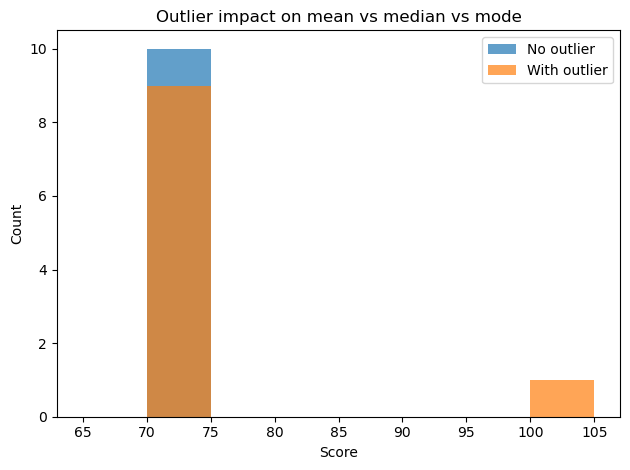

Saved figure to outlier_hist.png


In [ ]:
# ÏûÑÏùòÎ°ú ÎßåÎì† Îç∞Ïù¥ÌÑ∞
base_scores = np.array([70]*9 + [70])
with_outlier = np.array([70]*9 + [100])
scores_base = pd.Series(base_scores)
scores_out = pd.Series(with_outlier)

stats_base = {"mean": float(scores_base.mean()), "median": float(scores_base.median()), "mode": float(scores_base.mode().iloc[0]), "std": float(scores_base.std(ddof=1)), "scenario": "Scores (no outlier)"}
stats_out = {"mean": float(scores_out.mean()), "median": float(scores_out.median()), "mode": float(scores_out.mode().iloc[0]), "std": float(scores_out.std(ddof=1)), "scenario": "Scores (with outlier)"}

#histogram
plt.figure()
plt.hist(scores_base, bins=np.arange(65, 106, 5), alpha=0.7, label="No outlier")
plt.hist(scores_out, bins=np.arange(65, 106, 5), alpha=0.7, label="With outlier")
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Outlier impact on mean vs median vs mode")
plt.legend()
savefig("outlier_hist")

ÌèâÍ∑†: 2053.79
Ï§ëÏïôÍ∞í: 674.45
ÏµúÎπàÍ∞í: 76.32
ÌëúÏ§ÄÌé∏Ï∞®: 8988.25


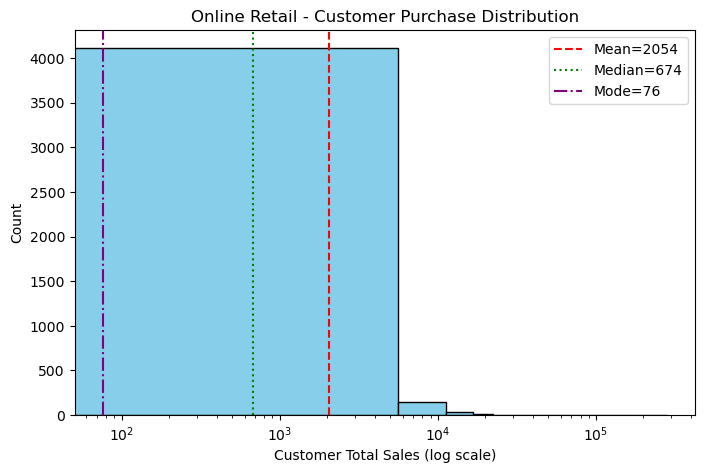

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (CSV ÌååÏùº Í≤ΩÎ°ú ÏàòÏ†ï ÌïÑÏöî)
df = pd.read_excel("Online Retail.xlsx")  # UCI Îç∞Ïù¥ÌÑ∞Îäî xlsx ÌòïÏãù
# UCI Data set -> Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ±∞ÎÇò Î®∏Ïã†Îü¨Îãù ÎèåÎ¶¨Í∏∞ ÎÑàÎ¨¥ Ï¢ãÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã. Ïú†Î™ÖÌï®.


# Í≤∞Ï∏°Ïπò/Ïù¥ÏÉÅÏπò Ï†úÍ±∞
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df["Sales"] = df["Quantity"] * df["UnitPrice"]

# Í≥†Í∞ùÎ≥Ñ Í≤∞Ï†ú Í∏àÏï° ÏßëÍ≥Ñ
customer_sales = df.groupby("CustomerID")["Sales"].sum()

# ÎåÄÌëúÍ∞í Í≥ÑÏÇ∞
mean_val = customer_sales.mean()
median_val = customer_sales.median()
mode_val = customer_sales.mode().iloc[0]
std_val = customer_sales.std()

print(f"ÌèâÍ∑†: {mean_val:.2f}")
print(f"Ï§ëÏïôÍ∞í: {median_val:.2f}")
print(f"ÏµúÎπàÍ∞í: {mode_val:.2f}")
print(f"ÌëúÏ§ÄÌé∏Ï∞®: {std_val:.2f}")

# ÌûàÏä§ÌÜ†Í∑∏Îû® (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
plt.figure(figsize=(8,5))
plt.hist(customer_sales, bins=50, color="skyblue", edgecolor="black")
plt.xscale("log")
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean={mean_val:.0f}")
plt.axvline(median_val, color="green", linestyle=":", label=f"Median={median_val:.0f}")
plt.axvline(mode_val, color="purple", linestyle="-.", label=f"Mode={mode_val:.0f}")
plt.xlabel("Customer Total Sales (log scale)")
plt.ylabel("Count")
plt.title("Online Retail - Customer Purchase Distribution")
plt.legend()
plt.show()


VIP Í≥†Í∞ù Ïàò: 217, ÏùºÎ∞ò Í≥†Í∞ù Ïàò: 4122
VIP Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞í: 5840.18

Ï†ÑÏ≤¥ Í≥†Í∞ù
{'Mean': 2053.793017746025, 'Median': 674.45, 'Mode': 76.32000000000001, 'Std': 8988.248381377653}

VIP Í≥†Í∞ù (ÏÉÅÏúÑ 5%)
{'Mean': 20688.480230414745, 'Median': 9736.52, 'Mode': 5870.08, 'Std': 35073.15182373498}

ÏùºÎ∞ò Í≥†Í∞ù (ÌïòÏúÑ 95%)
{'Mean': 1072.782070354197, 'Median': 626.55, 'Mode': 76.32000000000001, 'Std': 1148.2283845244738}


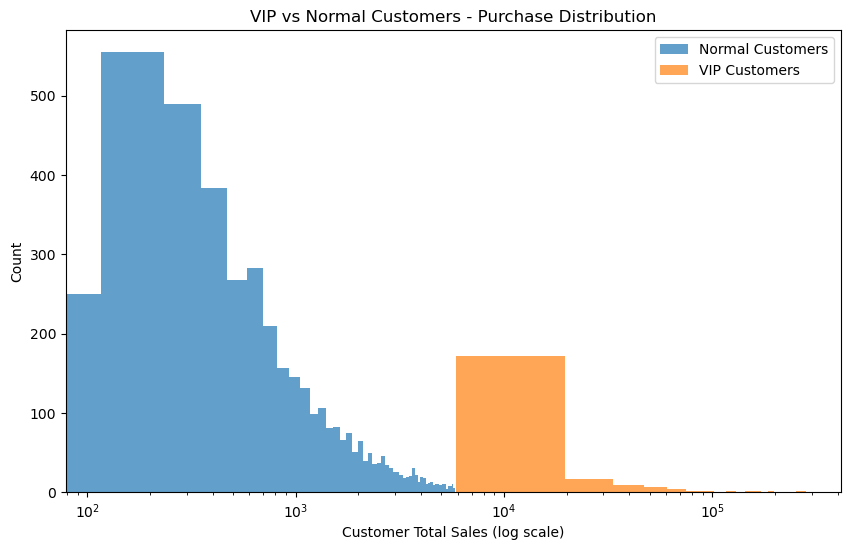

In [ ]:
# VIP ÏÉÅÏúÑ 5% / ÏùºÎ∞ò Í≥†Í∞ù 95% Íµ¨Î∂Ñ
threshold = np.percentile(customer_sales, 95) # 2ÏãúÍ∑∏Îßà
vip_sales = customer_sales[customer_sales >= threshold]
normal_sales = customer_sales[customer_sales < threshold]

print(f"VIP Í≥†Í∞ù Ïàò: {len(vip_sales)}, ÏùºÎ∞ò Í≥†Í∞ù Ïàò: {len(normal_sales)}")
print(f"VIP Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞í: {threshold:.2f}")

# ÎåÄÌëúÍ∞í Ìï®Ïàò
def summary(series):
    return {
        "Mean": series.mean(),
        "Median": series.median(),
        "Mode": series.mode().iloc[0],
        "Std": series.std()
    }

print("\nÏ†ÑÏ≤¥ Í≥†Í∞ù")
print(summary(customer_sales))
print("\nVIP Í≥†Í∞ù (ÏÉÅÏúÑ 5%)")
print(summary(vip_sales))
print("\nÏùºÎ∞ò Í≥†Í∞ù (ÌïòÏúÑ 95%)")
print(summary(normal_sales))

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÎπÑÍµê
plt.figure(figsize=(10,6))
plt.hist(normal_sales, bins=50, alpha=0.7, label="Normal Customers")
plt.hist(vip_sales, bins=20, alpha=0.7, label="VIP Customers")
plt.xscale("log")
plt.xlabel("Customer Total Sales (log scale)")
plt.ylabel("Count")
plt.title("VIP vs Normal Customers - Purchase Distribution")
plt.legend()
plt.show()

In [28]:
! pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 949.2/949.2 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 5.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=9d02c3a09155f90b4dac3c3f943b6d17d748eac5e49e8d04605ad726abc7d303
  Stored in directory: c:\users\sju12\appda

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏÇºÏÑ±Ï†ÑÏûê ÏòàÏãú)
ticker = "005930.KQ"  # ÏÇºÏÑ±Ï†ÑÏûê (ÌïúÍµ≠ Í±∞ÎûòÏÜå ÏΩîÏä§Ìîº)
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# Ï¢ÖÍ∞Ä Í∏∞Ï§Ä ÏàòÏùµÎ•†
data["Monthly_Return"] = data["Close"].pct_change()

# ÏõîÎ≥Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
#monthly_returns = data["Monthly_Return"].resample("M").sum().dropna()
monthly_returns = data["Monthly_Return"].resample("M").apply(lambda x: (1+x).prod()-1).dropna()


# Ìï®Ïàò Ï†ÅÏö©

ann_return, ann_std = annualized_stats(monthly_returns)

print(f"üìà ÏÇºÏÑ±Ï†ÑÏûê (2020~2024)")
print(f"Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†: {ann_return*100:.2f}%")
print(f"Ïó∞ÌôòÏÇ∞ Î≥ÄÎèôÏÑ±: {ann_std*100:.2f}%")

C:\Users\sju12\AppData\Local\Temp\ipykernel_20004\4010004339.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

üìà ÏÇºÏÑ±Ï†ÑÏûê (2020~2024)
Ïó∞ÌôòÏÇ∞ ÏàòÏùµÎ•†: 1.87%
Ïó∞ÌôòÏÇ∞ Î≥ÄÎèôÏÑ±: 26.98%



C:\Users\sju12\AppData\Local\Temp\ipykernel_20004\4010004339.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data["Monthly_Return"].resample("M").apply(lambda x: (1+x).prod()-1).dropna()
